<a href="https://colab.research.google.com/github/havaledar/ECON3740_F24/blob/main/ECON3740_F24_Lab_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reading data

For the lab, I am using the library but you should only use the Excel file provided in the MindTap.

In [1]:
%%capture

!pip install wooldridge

import wooldridge as woo

data = woo.data('401k')

In [5]:
woo.data('401k', description=True)

name of dataset: 401k
no of variables: 8
no of observations: 1534

+----------+---------------------------------+
| variable | label                           |
+----------+---------------------------------+
| prate    | participation rate, percent     |
| mrate    | 401k plan match rate            |
| totpart  | total 401k participants         |
| totelg   | total eligible for 401k plan    |
| age      | age of 401k plan                |
| totemp   | total number of firm employees  |
| sole     | = 1 if 401k is firm's sole plan |
| ltotemp  | log of totemp                   |
+----------+---------------------------------+

L.E. Papke (1995), “Participation in and Contributions to 401(k)
Pension Plans:Evidence from Plan Data,” Journal of Human Resources 30,
311-325. Professor Papke kindly provided these data. She gathered them
from the Internal Revenue Service’s Form 5500 tapes.


# Regressions

## Multiple Linear

In [37]:
import statsmodels.formula.api as smf

# Create the model
model1 = smf.ols('prate ~ age + totemp', data)

# Fit the model
results1 = model1.fit()

# Display regression results
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:                  prate   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     28.72
Date:                Tue, 17 Sep 2024   Prob (F-statistic):           5.70e-13
Time:                        19:09:40   Log-Likelihood:                -6468.3
No. Observations:                1534   AIC:                         1.294e+04
Df Residuals:                    1531   BIC:                         1.296e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     83.5669      0.735    113.655      0.0

## Log

In [39]:
import numpy as np

# Create the model
model2 = smf.ols('prate ~ np.log(totemp)', data)

# Fit the model
results2 = model2.fit()

# Display regression results
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                  prate   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     80.53
Date:                Tue, 17 Sep 2024   Prob (F-statistic):           8.19e-19
Time:                        19:10:56   Log-Likelihood:                -6457.2
No. Observations:                1534   AIC:                         1.292e+04
Df Residuals:                    1532   BIC:                         1.293e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        104.5479      1.960     53.

## Categorical variables

In [41]:
# Create the model
model3 = smf.ols('prate ~ C(sole)', data)

# Fit the model
results3 = model3.fit()

# Display regression results
print(results3.summary())

                            OLS Regression Results                            
Dep. Variable:                  prate   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     39.38
Date:                Tue, 17 Sep 2024   Prob (F-statistic):           4.52e-10
Time:                        19:12:54   Log-Likelihood:                -6477.0
No. Observations:                1534   AIC:                         1.296e+04
Df Residuals:                    1532   BIC:                         1.297e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       84.7821      0.589    143.959   

# Stargazer

In [8]:
%%capture

!pip install stargazer

from stargazer.stargazer import Stargazer as st


In [9]:
st([results])

# Pandas

In [17]:
import pandas as pd

In [26]:
data_40 = data[data['age']>=40]

## value_count

In [27]:
data_40['age'].unique()

array([42, 40, 48, 41, 43, 44, 45, 51])

In [28]:
data_40['age'].value_counts()

,count
age,
40,8
41,5
42,4
48,4
43,1
44,1
45,1
51,1


## sort

In [29]:
data_40['age'].value_counts().sort_index()

,count
age,
40,8
41,5
42,4
43,1
44,1
45,1
48,4
51,1


In [30]:
data_40['age'].value_counts().sort_values()

,count
age,
43,1
44,1
45,1
51,1
42,4
48,4
41,5
40,8


## crosstab

In [31]:
pd.crosstab(data_40['age'], data_40['sole'])

sole,0,1
age,,
40,5,3
41,2,3
42,4,0
43,1,0
44,1,0
45,1,0
48,4,0
51,1,0


### row-wise

In [32]:
pd.crosstab(data_40['age'], data_40['sole'], normalize = 0)

sole,0,1
age,,
40,0.625,0.375
41,0.400,0.600
42,1.000,0.000
43,1.000,0.000
44,1.000,0.000
45,1.000,0.000
48,1.000,0.000
51,1.000,0.000


### column-wise

In [33]:
pd.crosstab(data_40['age'], data_40['sole'], normalize = 1)

sole,0,1
age,,
40,0.263158,0.5
41,0.105263,0.5
42,0.210526,0.0
43,0.052632,0.0
44,0.052632,0.0
45,0.052632,0.0
48,0.210526,0.0
51,0.052632,0.0


## Group by

Summary statistics by group

Collapsing the data by group is the easiest way of getting stats for continuous vars


In [34]:
# Compute mean of 'AGE_6' grouped by 'SEX'

data_40.groupby('sole').agg(Age=('age', 'mean'))

,Age
sole,
0,43.421053
1,40.500000


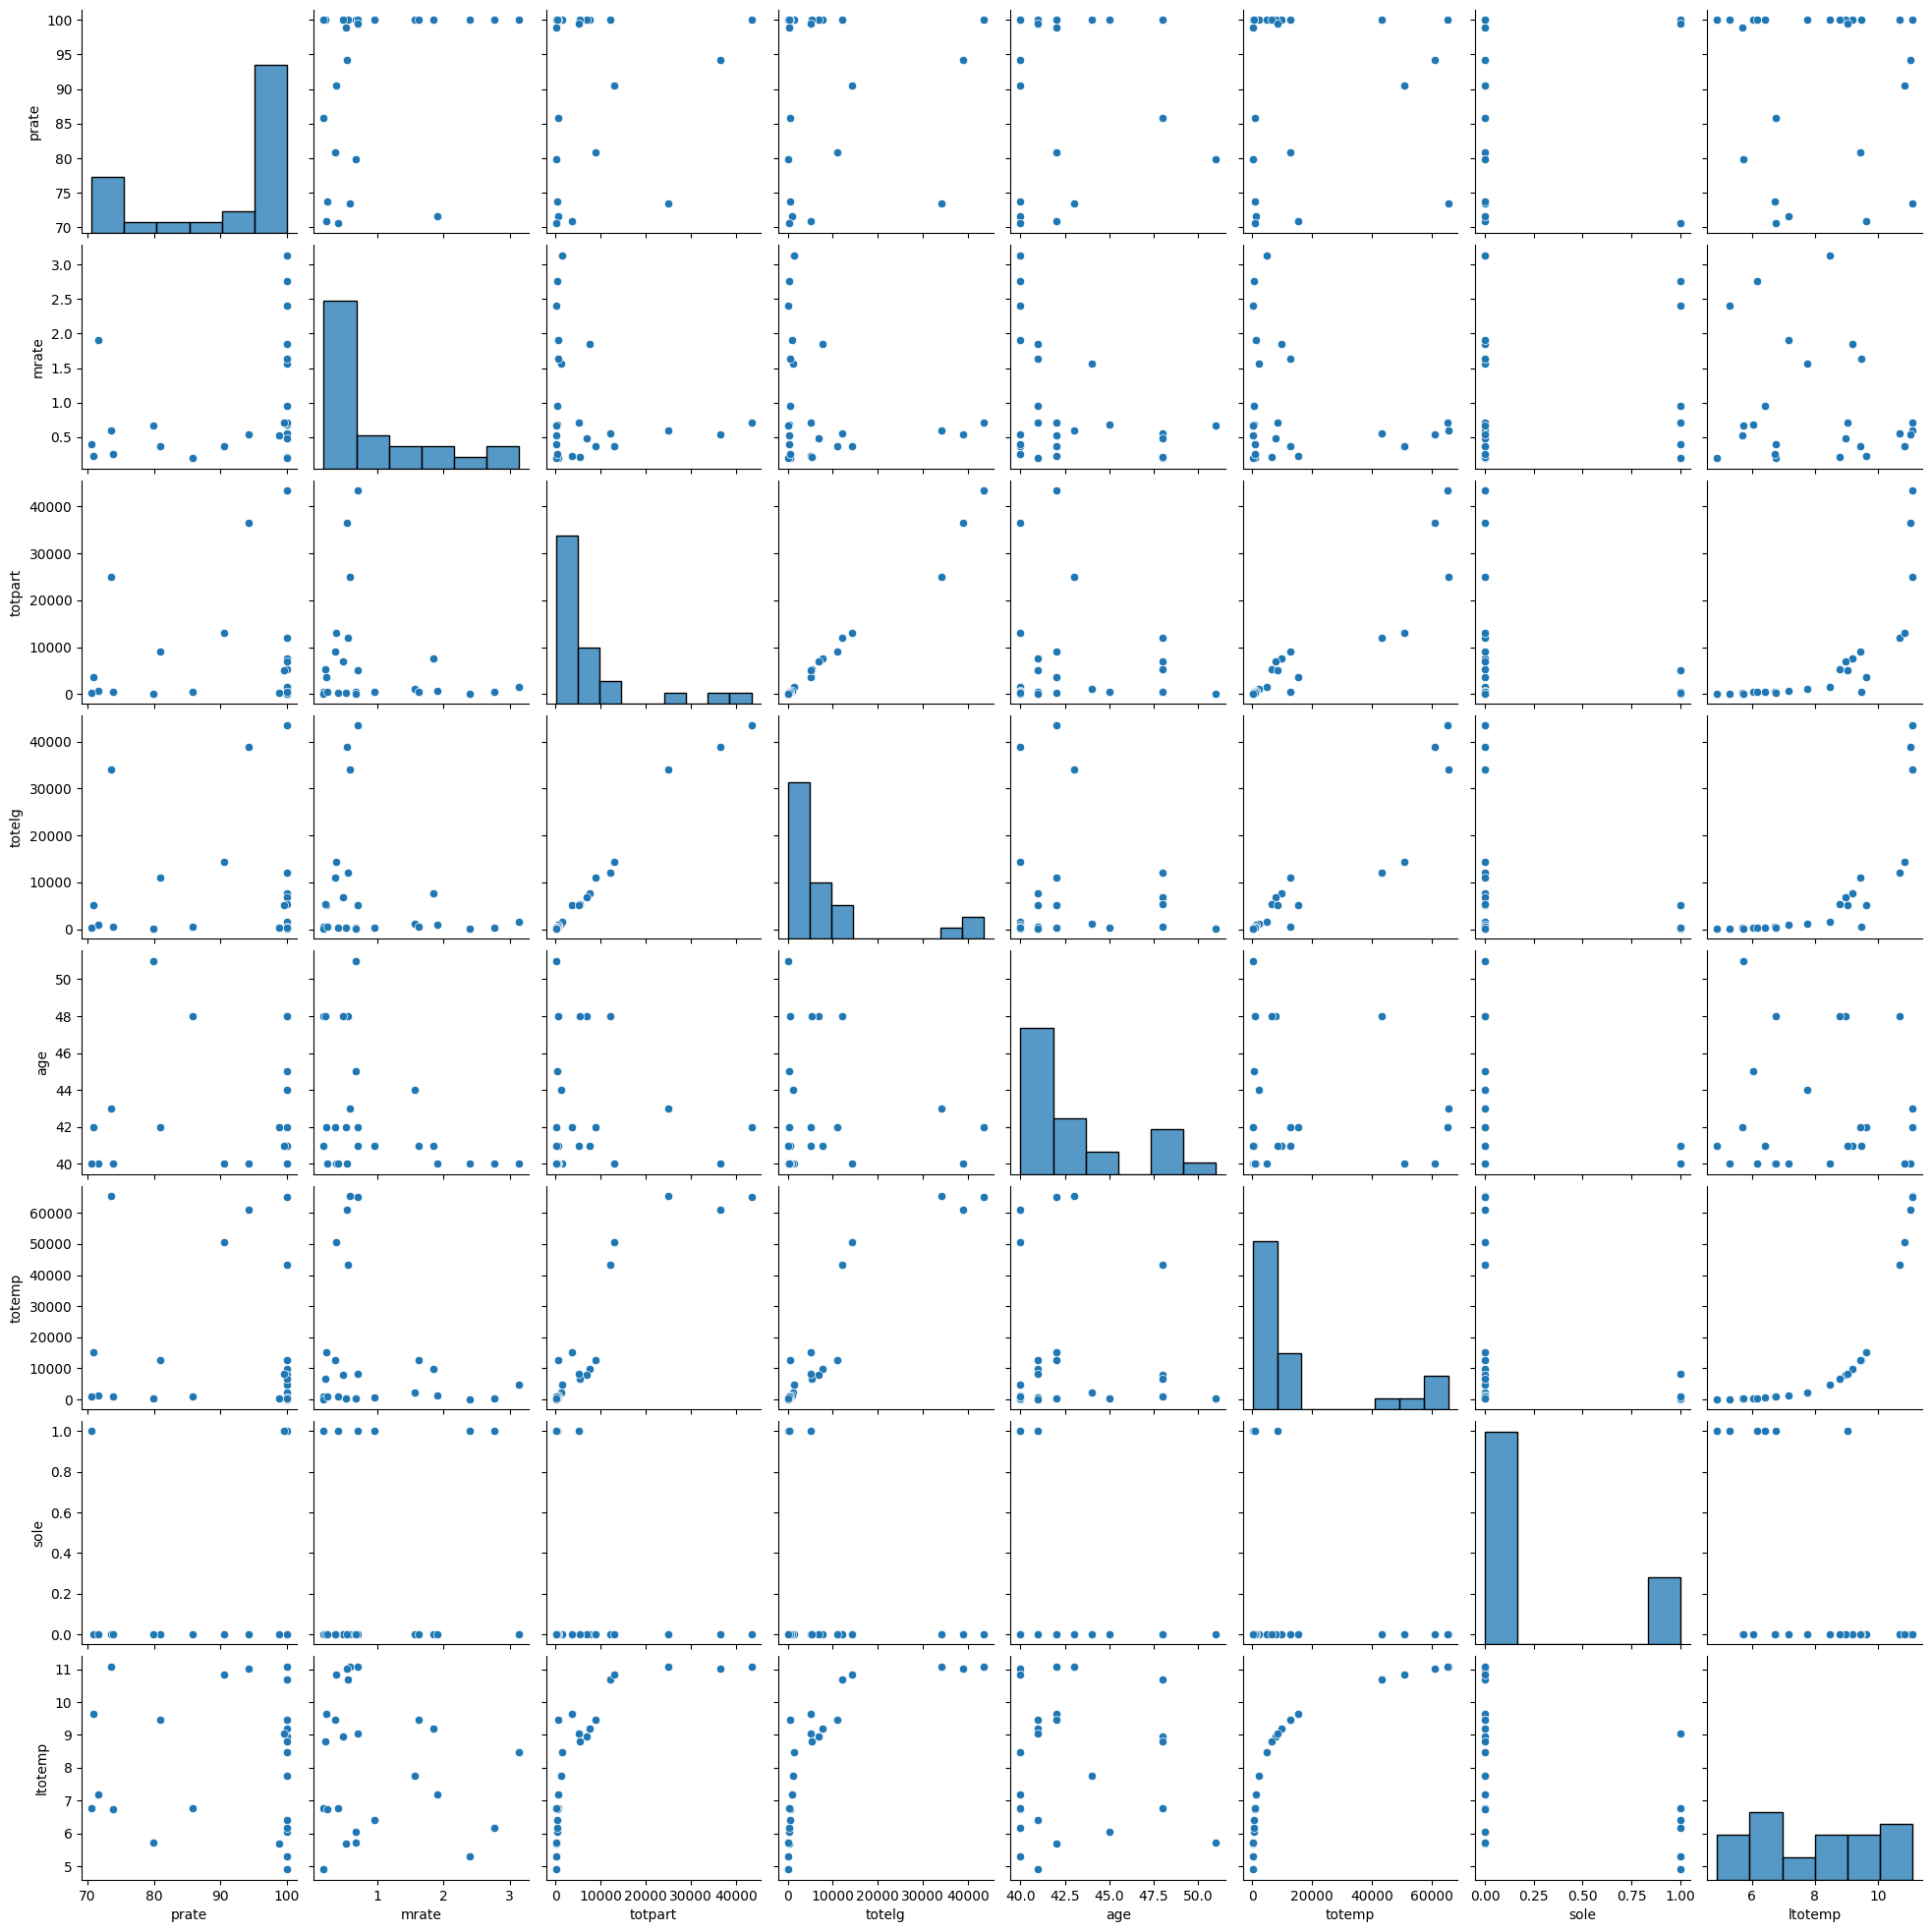

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already imported pandas and loaded your dataframe 'data_40'
sns.pairplot(data_40)

# Show the plot
plt.show()